In [1]:
import sys
sys.path.insert(0, "../")
sys.path.insert(0, "../experiments")


from experiment_information import *
from experiment_setup import *
from data import *
from helpers import *
from data_loading import *
import matplotlib.pyplot as plt



import pandas as pd
import numpy as np
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)


import numpy as np
import re
%load_ext autoreload
%autoreload 2



This code assumes that you have defined and run an experiment before using `define_experiment.ipynb` in the `experiments` folder.

In [2]:
df_experiments, df_state_evolution, df_erm = obtain_dataframes(logger)

Current code version, 113


In [3]:
df_experiments.head(5)

,experiment_id,experiment_name,duration,problem_types,code_version,date,state_evolution_repetitions,erm_repetitions,alphas,epsilons,...,taus,ps,dp,d,experiment_type,completed,data_model_types,data_model_names,data_model_descriptions,gamma_fair_error
76,a2d5f15b-d998-4194-9472-fdec68166773,FeatureComparisonsTest,52.055943,"[""Logistic""]",113,2024-06-13 11:39:17,1,0,"[0.1585, 0.3244, 0.6641, 1.3594, 2.7826, 5.695...","[0.0, 0.1]",...,[0.05],null,0.01,500,Sweep,1,"[""KFeaturesModel"", ""KFeaturesModel"", ""KFeature...","[""KFeaturesModel_TwoFeatures_ProtectingSecondS...","[""2 Features, Theta Identity, Sigma_upsilon Id...",0.0001
75,82be161b-3322-4c90-9a44-acef1d09f48a,FeatureComparisonsTest,53.624040,"[""Logistic""]",113,2024-06-13 11:33:20,1,0,"[0.1585, 0.3244, 0.6641, 1.3594, 2.7826, 5.695...","[0.0, 0.1]",...,[0.05],null,0.01,500,Sweep,1,"[""KFeaturesModel"", ""KFeaturesModel"", ""KFeature...","[""KFeaturesModel_TwoFeatures_ProtectingSecondS...","[""2 Features, Theta Identity, Sigma_upsilon Id...",0.0001
74,ec9461de-1157-4035-bfb6-54a92171bb31,FeatureComparisonsTest,46.997817,"[""Logistic""]",113,2024-06-12 15:52:05,1,0,"[0.1585, 0.3244, 0.6641, 1.3594, 2.7826, 5.695...","[0.0, 0.1]",...,[0.05],null,0.01,500,Sweep,1,"[""KFeaturesModel"", ""KFeaturesModel"", ""KFeature...","[""KFeaturesModel_TwoFeatures_ProtectingSecondS...","[""2 Features, Theta Identity, Sigma_upsilon Id...",0.0001
73,3bd80427-aa18-45d7-860e-b187c075c887,FeatureComparisonsTest,128.895808,"[""Logistic""]",113,2024-06-12 15:49:32,1,0,"[0.1585, 0.2961, 0.5532, 1.0334, 1.9307, 3.607...","[0.0, 0.1, 0.2]",...,[0.05],null,0.01,500,Sweep,1,"[""KFeaturesModel"", ""KFeaturesModel"", ""KFeature...","[""KFeaturesModel_TwoFeatures_ProtectingSecondS...","[""2 Features, Theta Identity, Sigma_upsilon Id...",0.0001
72,4288e7eb-b2ea-4f51-bca8-79a5ffe07d52,FeatureComparisonsTest,136.867235,"[""Logistic""]",113,2024-06-12 15:45:39,1,0,"[0.1585, 0.2961, 0.5532, 1.0334, 1.9307, 3.607...","[0.0, 0.1, 0.2]",...,[0.05],null,0.01,500,Sweep,1,"[""KFeaturesModel"", ""KFeaturesModel"", ""KFeature...","[""KFeaturesModel_TwoFeatures_ProtectingSecondS...","[""2 Features, Theta Identity, Sigma_upsilon Id...",0.0001


In [4]:
experiment_loc = 0

# extract and print the top experiment_id
experiment_id = df_experiments.iloc[experiment_loc]["experiment_id"]
print(experiment_id)

# extract and print the experiment type
experiment_type = df_experiments.iloc[experiment_loc]["experiment_type"]
print(experiment_type)

# extract and print the data model type and data_model name used
data_model_types = df_experiments.iloc[experiment_loc]["data_model_types"]
# convert it to the enum
data_model_types = [DataModelType[data_model_type] for data_model_type in json.loads(data_model_types)]
data_model_names = [name for name in json.loads(df_experiments.iloc[experiment_loc]["data_model_names"])]
data_model_descriptions = df_experiments.iloc[experiment_loc]["data_model_descriptions"]
for data_model_type in data_model_types:
    print(data_model_type.name)
print(data_model_names)
print(data_model_descriptions)

# print the experiment name
experiment_name = df_experiments.iloc[experiment_loc]["experiment_name"]
print(experiment_name)

# print the experiment problem types
experiment_problem_types = df_experiments.iloc[experiment_loc]["problem_types"]
experiment_problem_types = json.loads(experiment_problem_types)
print(experiment_problem_types)

a2d5f15b-d998-4194-9472-fdec68166773
Sweep
KFeaturesModel
KFeaturesModel
KFeaturesModel
KFeaturesModel
['KFeaturesModel_TwoFeatures_ProtectingSecondStronger_AttackingIdentity_[0.5 0.5]_[1.  0.1]_[1.  0.1]_SD_1_1_SU_1_1___FeatureComparisonsTest', 'KFeaturesModel_TwoFeatures_ProtectingSecondStronger_AttackingIdentity_[0.5 0.5]_[ 1 10]_[1.  0.1]_SD_1_1_SU_1_1___FeatureComparisonsTest', 'KFeaturesModel_TwoFeatures_ProtectingSecondStronger_AttackingIdentity_[0.5 0.5]_[1.  0.1]_[ 1 10]_SD_1_1_SU_1_1___FeatureComparisonsTest', 'KFeaturesModel_TwoFeatures_ProtectingSecondStronger_AttackingIdentity_[0.5 0.5]_[ 1 10]_[ 1 10]_SD_1_1_SU_1_1___FeatureComparisonsTest']
["2 Features, Theta Identity, Sigma_upsilon Identity, Sigma_delta Identity", "2 Features, Theta Identity, Sigma_upsilon Identity, Sigma_delta Identity", "2 Features, Theta Identity, Sigma_upsilon Identity, Sigma_delta Identity", "2 Features, Theta Identity, Sigma_upsilon Identity, Sigma_delta Identity"]
FeatureComparisonsTest
['Logist

In [5]:
data_model_name_dict = {}
data_model_name_dict["VanillaGaussian"] = "Vanilla Gaussian"
data_model_name_dict["2_VanillaGaussian"] = "Vanilla Gaussian"
data_model_name_dict["VanillaGaussianThetaFirst"] = "Vanilla Gaussian - Teacher 10:1"
data_model_name_dict["VanillaGaussianTimes10"] = "Vanilla Gaussian x10"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingIdentity_AttackingIdentity_[0.5 0.5]_[10  1]_[1 1]"] = "Strong Weak 10:1"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingIdentity_AttackingIdentity_[0.5 0.5]_[5 1]_[1 1]"] = "Strong Weak 5:1"
data_model_name_dict["2_KFeaturesModel_TwoFeatures_ProtectingIdentity_AttackingIdentity_[0.5 0.5]_[5 1]_[1 1]"] = "Strong Weak 5:1"
data_model_name_dict["2_KFeaturesModel_TwoFeatures_ProtectingIdentity_AttackingIdentity_[0.5 0.5]_[10  1]_[1 1]"] = "Strong Weak 10:1"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingIdentity_AttackingIdentity_[0.5 0.5]_[5 1]_[10  1]"] = "Strong Weak 5:1 - Teacher 10:1"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingIdentity_AttackingIdentity_[0.5 0.5]_[10  1]_[10  1]"] = "Strong Weak 10:1 - Teacher 10:1"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingIdentity_AttackingIdentity_[0.5 0.5]_[5 1]_[ 1 10]"] = "Strong Weak 5:1 - Teacher 1:10"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingIdentity_AttackingIdentity_[0.5 0.5]_[10  1]_[ 1 10]"] = "Strong Weak 10:1 - Teacher 1:10"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingSecondStronger_AttackingIdentity_[0.5 0.5]_[1 1]_[1 1]_SD_1_1_SU_1_1___RhoNormalisationSweepAllFeatureCombinations"] = "Non-Robust Non-Useful"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingSecondStronger_AttackingIdentity_[0.5 0.5]_[5 5]_[5 5]_SD_1_1_SU_1_1___RhoNormalisationSweepAllFeatureCombinations"] = "Robust Useful"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingSecondStronger_AttackingIdentity_[0.5 0.5]_[1 1]_[5 5]_SD_1_1_SU_1_1___RhoNormalisationSweepAllFeatureCombinations"] = "Non-Robust Useful"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingSecondStronger_AttackingIdentity_[0.5 0.5]_[5 5]_[1 1]_SD_1_1_SU_1_1___RhoNormalisationSweepAllFeatureCombinations"] = "Robust Non-Useful"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingSecondStronger_AttackingIdentity_[0.5 0.5]_[1 1]_[1 1]_SD_1_1_SU_1_1"] = "Non-Robust Non-Useful"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingSecondStronger_AttackingIdentity_[0.5 0.5]_[5 5]_[5 5]_SD_1_1_SU_1_1"] = "Robust Useful"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingSecondStronger_AttackingIdentity_[0.5 0.5]_[1 1]_[5 5]_SD_1_1_SU_1_1"] = "Non-Robust Useful"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingSecondStronger_AttackingIdentity_[0.5 0.5]_[5 5]_[1 1]_SD_1_1_SU_1_1"] = "Robust Non-Useful"

data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingSecondStronger_AttackingIdentity_[0.5 0.5]_[2 2]_[2 2]_SD_1_1_SU_1_1"] = "Robust Useful"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingSecondStronger_AttackingIdentity_[0.5 0.5]_[1 1]_[4 4]_SD_1_1_SU_1_1"] = "Non-Robust Useful"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingSecondStronger_AttackingIdentity_[0.5 0.5]_[2 2]_[0.5 0.5]_SD_1_1_SU_1_1"] = "Robust Non-Useful"


data_model_name_dict['KFeaturesModel_TwoFeatures_ProtectingSecondStronger_AttackingIdentity_[0.5 0.5]_[0.5 0.5]_[2 2]_SD_1_1_SU_1_1'] = "Non-Robust Non-Useful"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingSecondStronger_AttackingIdentity_[0.5 0.5]_[0.5 0.5]_[8 8]_SD_1_1_SU_1_1"] = "Non-Robust Useful"


In [6]:
state_evolution = df_state_evolution[df_state_evolution["experiment_id" ] == experiment_id]
gd = df_erm[df_erm["experiment_id" ] == experiment_id]
# make the column subspace_overlaps to string
state_evolution["subspace_overlaps"] = state_evolution["subspace_overlaps"].apply(lambda x: str(x))
gd["subspace_overlaps"] = gd["subspace_overlaps"].apply(lambda x: str(x))

# create a json colum
state_evolution["subspace_overlaps"] = state_evolution["subspace_overlaps"].apply(lambda x: json.loads(x))
gd["subspace_overlaps"] = gd["subspace_overlaps"].apply(lambda x: json.loads(x))
from pandas import json_normalize
# normalize the json column
normalized = json_normalize(state_evolution["subspace_overlaps"])
normalized_gd = json_normalize(gd["subspace_overlaps"])



def explode_array_column(row, col):
    return pd.Series(row[col])

# reset the index of the original dataframe
state_evolution = state_evolution.reset_index(drop=True)
gd = gd.reset_index(drop=True)

for col in normalized.columns:
    expanded_cols = normalized.apply(lambda x: explode_array_column(x,col), axis=1)
    col = col[:-1]
    expanded_cols.columns = [col+'_{}'.format(i) for i in range(expanded_cols.shape[1])]
    # reset the index of the expanded columns
    expanded_cols = expanded_cols.reset_index(drop=True)
    state_evolution = pd.concat([state_evolution, expanded_cols], axis=1)

for col in normalized_gd.columns:
    expanded_cols = normalized_gd.apply(lambda x: explode_array_column(x,col), axis=1)
    col = col[:-1]
    expanded_cols.columns = [col+'_{}'.format(i) for i in range(expanded_cols.shape[1])]
    # reset the index of the expanded columns
    expanded_cols = expanded_cols.reset_index(drop=True)

    gd = pd.concat([gd, expanded_cols], axis=1)



/var/folders/vl/6t_sjl4j16nd3xx4b0t7wd280000gn/T/ipykernel_15749/3541688095.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_evolution["subspace_overlaps"] = state_evolution["subspace_overlaps"].apply(lambda x: str(x))
/var/folders/vl/6t_sjl4j16nd3xx4b0t7wd280000gn/T/ipykernel_15749/3541688095.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_evolution["subspace_overlaps"] = state_evolution["subspace_overlaps"].apply(lambda x: json.loads(x))


In [7]:
state_evolution["subspace_overlaps_ratio"] = state_evolution["subspace_overlaps_ratio"].apply(lambda x: str(x))
state_evolution["subspace_overlaps_ratio"] = state_evolution["subspace_overlaps_ratio"].apply(lambda x: json.loads(x))
normalized = json_normalize(state_evolution["subspace_overlaps_ratio"])
# rename the columns of the normalized dataframe
for column in normalized.columns:
    normalized = normalized.rename(columns={column:column+"_ratio"})
# merge the normalized dataframe with the original dataframe
state_evolution = pd.concat([state_evolution, normalized], axis=1)
# drop the original subspace_overlaps column
state_evolution = state_evolution.drop(columns=["subspace_overlaps_ratio"])

gd["subspace_overlaps_ratio"] = gd["subspace_overlaps_ratio"].apply(lambda x: str(x))
gd["subspace_overlaps_ratio"] = gd["subspace_overlaps_ratio"].apply(lambda x: json.loads(x))
normalized = json_normalize(gd["subspace_overlaps_ratio"])
# rename the columns of the normalized dataframe
for column in normalized.columns:
    normalized = normalized.rename(columns={column:column+"_ratio"})
# merge the normalized dataframe with the original dataframe
gd = pd.concat([gd, normalized], axis=1)
# drop the original subspace_overlaps column
gd = gd.drop(columns=["subspace_overlaps_ratio"])


In [8]:
# create a column for the difference between the adversarial_generalization_error and the generalization_error for both the state evolution and the erm
state_evolution["difference_adv_gen"] = state_evolution["adversarial_generalization_error"] - state_evolution["generalization_error"]
gd["difference_adv_gen"] = gd["adversarial_generalization_error"] - gd["generalization_error_erm"]


state_evolution["ratio_adv_gen"] = state_evolution["adversarial_generalization_error"] / state_evolution["generalization_error"]
gd["ratio_adv_gen"] = gd["adversarial_generalization_error"] / gd["generalization_error_erm"]

In [9]:
# create a column for the noise contribution
def noise_contribution(rho: float, tau: float) -> float:
    if tau == 0:
        tau = 1e-10
    return 0.5 - np.arctan( np.sqrt( rho / tau**2 ) ) / np.pi

state_evolution["noise_contribution"] = state_evolution.apply(lambda x: noise_contribution(x["rho"], x["tau"]), axis=1)
gd["noise_contribution"] = gd.apply(lambda x: noise_contribution(x["rho"], x["tau"]), axis=1)

In [10]:
# create a column for the noiseless generalization error without the noise contribution
state_evolution["noiseless_generalization_error"] = state_evolution["generalization_error"] - state_evolution["noise_contribution"]
gd["noiseless_generalization_error_erm"] = gd["generalization_error_erm"] - gd["noise_contribution"]

# create a column for the adversarial noiseless generalization error without the noise contribution
state_evolution["noiseless_adversarial_generalization_error"] = state_evolution["adversarial_generalization_error"] - state_evolution["noise_contribution"]
gd["noiseless_adversarial_generalization_error"] = gd["adversarial_generalization_error"] - gd["noise_contribution"]

In [11]:
def noiseless_angle_to_generalisation(angle):
    return np.arccos(angle) / np.pi

state_evolution["noiseless_angle_to_generalisation"] = state_evolution.apply(lambda x: noiseless_angle_to_generalisation(x["angle"]), axis=1)
gd["noiseless_angle_to_generalisation"] = gd.apply(lambda x: noiseless_angle_to_generalisation(x["angle"]), axis=1)

In [12]:
# create a column for the A/sqrt(q*N) for both the state evolution and the erm
state_evolution["A_over_sqrt_qN"] = state_evolution["A"] / np.sqrt(state_evolution["q"] * state_evolution["N"])
gd["A_over_sqrt_qN"] = gd["A"] / np.sqrt(gd["q"] * gd["N"])

In [13]:
# create a column for m/sqrt( rho*q - m**2 ) vs A/sqrt(q*N) for both the state evolution and the erm
state_evolution["m_over_sqrt_rhoq_minus_m2"] = state_evolution["m"] / np.sqrt(state_evolution["rho"] * state_evolution["q"] - state_evolution["m"]**2)
gd["m_over_sqrt_rhoq_minus_m2"] = gd["m"] / np.sqrt(gd["rho"] * gd["q"] - gd["m"]**2)

In [14]:
# strip the data_model_name if there is a sequence ___text at the end
def strip_data_model_name(data_model_name):
    return re.sub(r"___.*","",data_model_name)
state_evolution["data_model_name"] = state_evolution["data_model_name"].apply(strip_data_model_name)
gd["data_model_name"] = gd["data_model_name"].apply(strip_data_model_name)

In [15]:
def extract_theta_ratio(data_model_name):
    # a typical data_model_name looks like ""KFeaturesModel_TwoFeatures_ProtectingIdentity_AttackingIdentity_[0.5 0.5]_[5 1]_[1. 1.]_SD_1_1_SU_1_1""
    # we want to extract the digits in within the last square brackets
    theta_part = data_model_name.split("[")[-1].split("]")[0]
    # remove any spaces in the end
    theta_part = theta_part.strip()
    

    # concatenate multiple spaces into one space
    theta_part = re.sub(r"\s+"," ",theta_part)

    # determine whether the two values are split by " " or by "  "
    if "  " in theta_part:
        splitter = "  "
    else:
        splitter = " "

    theta_first = float(theta_part.split(splitter)[0])
    theta_second = float(theta_part.split(splitter)[1])
    return theta_second # / theta_first  


state_evolution["theta_ratio"] = state_evolution["data_model_name"].apply(extract_theta_ratio)
gd["theta_ratio"] = gd["data_model_name"].apply(extract_theta_ratio)

In [16]:
def extract_sigmax_ratio(data_model_name):
    # a typical data_model_name looks like ""KFeaturesModel_TwoFeatures_ProtectingIdentity_AttackingIdentity_[0.5 0.5]_[5 1]_[1. 1.]_SD_1_1_SU_1_1""
    # we want to extract the digits in within the last square brackets
    theta_part = data_model_name.split("[")[-2].split("]")[0]
    # remove any spaces in the end
    theta_part = theta_part.strip()

    # concatenate multiple spaces into one space
    theta_part = re.sub(r"\s+"," ",theta_part)

    # determine whether the two values are split by " " or by "  "
    if "  " in theta_part:
        splitter = "  "
    else:
        splitter = " "

    theta_first = float(theta_part.split(splitter)[0])
    theta_second = float(theta_part.split(splitter)[1])
    return theta_first # / theta_second


state_evolution["sigmax_ratio"] = state_evolution["data_model_name"].apply(extract_sigmax_ratio)
gd["sigmax_ratio"] = gd["data_model_name"].apply(extract_sigmax_ratio)

In [17]:
def extract_sigmadelta_ratio(data_model_name):
    # a typical data_model_name looks like ""KFeaturesModel_TwoFeatures_ProtectingIdentity_AttackingIdentity_[0.5 0.5]_[5 1]_[1. 1.]_SD_1_1_SU_1_1""
    # we want to extract the digits after the SD_ only
    theta_part = data_model_name.split("SD")[-1].split("SU")[0]
    # print("Post SD: ", theta_part)


    # remove leading _ and ending _
    theta_part = theta_part.strip("_")
    # print("Post strip: ", theta_part)

    # concatenate multiple spaces into one space
    theta_part = re.sub(r"\s+"," ",theta_part)

    # define the spliter to be "_"
    splitter = "_"

    theta_first = float(theta_part.split(splitter)[0])
    theta_second = float(theta_part.split(splitter)[1])
    # print("Theta first: ", theta_first)
    # print("Theta second: ", theta_second)
    return theta_second  #/ theta_first

def extract_sigmadelta_scale(data_model_name):
    # a typical data_model_name looks like ""KFeaturesModel_TwoFeatures_ProtectingIdentity_AttackingIdentity_[0.5 0.5]_[5 1]_[1. 1.]_SD_1_1_SU_1_1""
    # we want to extract the digits after the SD_ only
    theta_part = data_model_name.split("SD")[-1].split("SU")[0]
    # print("Post SD: ", theta_part)


    # remove leading _ and ending _
    theta_part = theta_part.strip("_")
    # print("Post strip: ", theta_part)

    # concatenate multiple spaces into one space
    theta_part = re.sub(r"\s+"," ",theta_part)

    # define the spliter to be "_"
    splitter = "_"

    theta_first = float(theta_part.split(splitter)[0])
    theta_second = float(theta_part.split(splitter)[1])
    # print("Theta first: ", theta_first)
    # print("Theta second: ", theta_second)
    return theta_first


state_evolution["sigmadelta_ratio"] = state_evolution["data_model_name"].apply(extract_sigmadelta_ratio)
gd["sigmadelta_ratio"] = gd["data_model_name"].apply(extract_sigmadelta_ratio)

state_evolution["sigmadelta_scale"] = state_evolution["data_model_name"].apply(extract_sigmadelta_scale)
gd["sigmadelta_scale"] = gd["data_model_name"].apply(extract_sigmadelta_scale)

In [18]:
gd = gd.set_index(["alpha","epsilon","tau","lam","problem_type","attack_epsilon","sigmax_ratio","sigmadelta_ratio","theta_ratio","data_model_name"]) #,"p_calibration"
state_evolution = state_evolution.set_index(["alpha","epsilon","tau","lam","problem_type","attack_epsilon","sigmax_ratio","sigmadelta_ratio","theta_ratio","data_model_name"]) #,"p_calibration"

# drop id, code_version, experiment_id, date, initial_condition, test_against_epsilons, calibrations, abs_tol, min_iter,max_iter,blend_fpe,int_lims,subspace_overlaps
state_evolution = state_evolution.drop(columns=["id","code_version","experiment_id","date","initial_condition","test_against_epsilons","calibrations","abs_tol","min_iter","max_iter","blend_fpe","int_lims","subspace_overlaps","data_model_type","data_model_description"])
# drop id, code_version, experiment_id, test_against_epsilons, date, subspace_overlaps, analytical_calibrations, erm_calibrations, 
gd = gd.drop(columns=["id","code_version","experiment_id","test_against_epsilons","date","subspace_overlaps","analytical_calibrations","erm_calibrations","data_model_type","data_model_description"])

state_evolution.columns = [col+"_state_evolution" for col in state_evolution.columns]
gd.columns = [col+"_erm" for col in gd.columns]

state_evolution = state_evolution.groupby(level=[0,1,2,3,4,5,6,7,8,9]).agg(["mean","std"]) #,4
gd = gd.groupby(level=[0,1,2,3,4,5,6,7,8,9]).agg(["mean","std"]) #,4
df = state_evolution.join(gd, how="outer")
df.sort_index()
df

index_state_evolution  \
                                                                                                                                                                      mean   
alpha    epsilon tau  lam   problem_type attack_epsilon sigmax_ratio sigmadelta_ratio theta_ratio data_model_name                                                            
0.1585   0.0     0.05 0.001 Logistic     0.1            1.0          1.0              0.1         KFeaturesModel_TwoFeatures_ProtectingSecondStro...                6849.0   
                                                                                                  KFeaturesModel_TwoFeatures_ProtectingSecondStro...                6835.0   
                                                                                      10.0        KFeaturesModel_TwoFeatures_ProtectingSecondStro...                6890.0   
                                                                                                  KFeaturesModel_TwoFeatures_ProtectingSecondStro...                6869.0   
         0.1     0.05 0.001 Logistic     0.1            1.0          1.0              0.1         KFeaturesModel_TwoFeatures_ProtectingSecondStro...                6850.0   
...                                                                                                                                                                    ...   
100.0000 0.0     0.05 0.001 Logistic     0.1            1.0          1.0              10.0        KFeaturesModel_TwoFeatures_ProtectingSecondStro...                6906.0   
         0.1     0.05 0.001 Logistic     0.1            1.0          1.0              0.1         KFeaturesModel_TwoFeatures_ProtectingSecondStro...                6870.0   
                                                                                                  KFeaturesModel_TwoFeatures_ProtectingSecondStro...                6874.0   
                                                                                      10.0        KFeaturesModel_TwoFeatures_ProtectingSecondStro...                6912.0   
                                                                                                  KFeaturesModel_TwoFeatures_ProtectingSecondStro...                6895.0   

                                                                                                                                                          \
                                                                                                                                                     std   
alpha    epsilon tau  lam   problem_type attack_epsilon sigmax_ratio sigmadelta_ratio theta_ratio data_model_name                                          
0.1585   0.0     0.05 0.001 Logistic     0.1            1.0          1.0              0.1         KFeaturesModel_TwoFeatures_ProtectingSecondStro... NaN   
                                                                                                  KFeaturesModel_TwoFeatures_ProtectingSecondStro... NaN   
                                                                                      10.0        KFeaturesModel_TwoFeatures_ProtectingSecondStro... NaN   
                                                                                                  KFeaturesModel_TwoFeatures_ProtectingSecondStro... NaN   
         0.1     0.05 0.001 Logistic     0.1            1.0          1.0              0.1         KFeaturesModel_TwoFeatures_ProtectingSecondStro... NaN   
...                                                                                                                                                   ..   
100.0000 0.0     0.05 0.001 Logistic     0.1            1.0          1.0              10.0        KFeaturesModel_TwoFeatures_ProtectingSecondStro... NaN   
         0.1     0.05 0.001 Logistic     0.1            1.0          1.0              0.1         KFeaturesModel_TwoFeatures_ProtectingSecondStro... NaN

In [19]:
def extract_rho_norm_usefulness(row):
    # extract sigmax_ratio from the index
    sigmax_ratio = row["sigmax_ratio"]
    sigmatheta_ratio = row["theta_ratio"]

    sigmax_ratio = float(sigmax_ratio)
    sigmatheta_ratio = float(sigmatheta_ratio)

    norm = (sigmax_ratio + sigmatheta_ratio**2) * 0.5

    subspace_rho_1 = sigmax_ratio / (2 * norm)

    usefulness = subspace_rho_1 / ( 1 - subspace_rho_1 )

    subspace_rho_2 = sigmatheta_ratio**2 / (2*norm)

    assert subspace_rho_1 + subspace_rho_2 - 1 < 1e-5, "Subspace rho 1 and 2 should sum to 1 but they are {} and {}".format(subspace_rho_1, subspace_rho_2)


    return usefulness

def extract_trace_norm_usefulness(row):
    sigmax_ratio = row["sigmax_ratio"]
    sigmatheta_ratio = row["theta_ratio"]
    rho = row["rho_state_evolution"]["mean"]

    sigmax_ratio = float(sigmax_ratio)
    sigmatheta_ratio = float(sigmatheta_ratio)
    rho = float(rho)

    norm = (1/4) * (1 + sigmax_ratio) * ( 1 + sigmatheta_ratio**2)

    subspace_1 = 0.5 * sigmax_ratio / norm
    subspace_2 = 0.5 * sigmatheta_ratio**2 / norm

    # assert subspace_1 + subspace_2 - rho < 1e-5, "Subspace rho 1 and 2 should sum to 1 but they are {} and {}".format(subspace_1, subspace_2)

    usefulness = subspace_1 / ( rho - subspace_1 )

    return usefulness

def extract_relative_usefulness(row):
    sigmax_ratio = row["sigmax_ratio"]
    sigmatheta_ratio = row["theta_ratio"]

    sigmax_ratio = float(sigmax_ratio)
    sigmatheta_ratio = float(sigmatheta_ratio)

    return sigmax_ratio / sigmatheta_ratio**2

def extract_usefulness(row):
    rho = row["rho_state_evolution"]["mean"]
    rho = float(rho)
    return rho


df2 = df.reset_index()


df2["total_usefulness"] = df2.apply(extract_usefulness, axis=1)

# # apply mean and std to the new column
# df_result = df2["total_usefulness"].apply(lambda x: pd.Series({"mean":x, "std":0}))
# multiindex = pd.MultiIndex.from_product([['total_usefulness'], ['mean', 'std']], names=['', ''])
# df_result.columns = multiindex
# # Concatenate the original DataFrame with the computed values DataFrame
# df2 = pd.concat([df2, df_result], axis=1)


df2["rho_usefulness"] = df2.apply(extract_rho_norm_usefulness, axis=1)


# apply mean and std to the new column
df_result = df2["rho_usefulness"].apply(lambda x: pd.Series({"mean":x, "std":0}))
multiindex = pd.MultiIndex.from_product([['rho_usefulness'], ['mean', 'std']], names=['', ''])
df_result.columns = multiindex
# Concatenate the original DataFrame with the computed values DataFrame
df2 = pd.concat([df2, df_result], axis=1)

df2["trace_usefulness"] = df2.apply(extract_trace_norm_usefulness, axis=1)

# apply mean and std to the new column
df_result = df2["trace_usefulness"].apply(lambda x: pd.Series({"mean":x, "std":0}))
multiindex = pd.MultiIndex.from_product([['trace_usefulness'], ['mean', 'std']], names=['', ''])
df_result.columns = multiindex
# Concatenate the original DataFrame with the computed values DataFrame
df2 = pd.concat([df2, df_result], axis=1)

df2["relative_usefulness"] = df2.apply(extract_relative_usefulness, axis=1)

# apply mean and std to the new column
# df_result = df2["relative_usefulness"].apply(lambda x: pd.Series({"mean":x, "std":0}))
# multiindex = pd.MultiIndex.from_product([['relative_usefulness'], ['mean', 'std']], names=['', ''])
# df_result.columns = multiindex
# Concatenate the original DataFrame with the computed values DataFrame
df2 = pd.concat([df2, df_result], axis=1)

# # apply mean and std to the column "theta_ratio"
# df_result = df2["theta_ratio"].apply(lambda x: pd.Series({"mean":x, "std":0}))
# multiindex = pd.MultiIndex.from_product([['theta_ratio'], ['mean', 'std']], names=['', ''])
# df_result.columns = multiindex
# # Concatenate the original DataFrame with the computed values DataFrame
# df2 = pd.concat([df2, df_result], axis=1)

# df_result = df2["sigmax_ratio"].apply(lambda x: pd.Series({"mean":x, "std":0}))
# multiindex = pd.MultiIndex.from_product([['sigmax_ratio'], ['mean', 'std']], names=['', ''])
# df_result.columns = multiindex
# # Concatenate the original DataFrame with the computed values DataFrame
# df2 = pd.concat([df2, df_result], axis=1)


# set all quantities from the df index in df2 as index
# df = df2.set_index(["alpha","epsilon","tau","lam","problem_type","attack_epsilon","sigmax_ratio","sigmadelta_ratio","relative_usefulness","data_model_name"]) #,"p_calibration"
# df = df2.set_index(["alpha","epsilon","tau","lam","problem_type","attack_epsilon","sigmax_ratio","sigmadelta_ratio","total_usefulness","data_model_name"]) 
df = df2.set_index(["alpha","epsilon","tau","lam","problem_type","attack_epsilon","theta_ratio","sigmax_ratio","sigmadelta_ratio","total_usefulness","data_model_name"]) #,"p_calibration"


# sort index
df.sort_index()



/var/folders/vl/6t_sjl4j16nd3xx4b0t7wd280000gn/T/ipykernel_15749/1728979210.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  sigmax_ratio = float(sigmax_ratio)
/var/folders/vl/6t_sjl4j16nd3xx4b0t7wd280000gn/T/ipykernel_15749/1728979210.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  sigmatheta_ratio = float(sigmatheta_ratio)
/var/folders/vl/6t_sjl4j16nd3xx4b0t7wd280000gn/T/ipykernel_15749/1728979210.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  sigmax_ratio = float(sigmax_ratio)
/var/folders/vl/6t_sjl4j16nd3xx4b0t7wd280000gn/T/ipykernel_15749/1728979210.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(

index_state_evolution  \
                                                                                                                                                                                       mean   
alpha    epsilon tau  lam   problem_type attack_epsilon theta_ratio sigmax_ratio sigmadelta_ratio total_usefulness data_model_name                                                            
0.1585   0.0     0.05 0.001 Logistic     0.1            0.1         1.0          1.0              0.330579         KFeaturesModel_TwoFeatures_ProtectingSecondStro...                6849.0   
                                                                                                  1.669421         KFeaturesModel_TwoFeatures_ProtectingSecondStro...                6835.0   
                                                        10.0        1.0          1.0              0.330579         KFeaturesModel_TwoFeatures_ProtectingSecondStro...                6869.0   
                                                                                                  1.669421         KFeaturesModel_TwoFeatures_ProtectingSecondStro...                6890.0   
         0.1     0.05 0.001 Logistic     0.1            0.1         1.0          1.0              0.330579         KFeaturesModel_TwoFeatures_ProtectingSecondStro...                6850.0   
...                                                                                                                                                                                     ...   
100.0000 0.0     0.05 0.001 Logistic     0.1            10.0        1.0          1.0              1.669421         KFeaturesModel_TwoFeatures_ProtectingSecondStro...                6913.0   
         0.1     0.05 0.001 Logistic     0.1            0.1         1.0          1.0              0.330579         KFeaturesModel_TwoFeatures_ProtectingSecondStro...                6870.0   
                                                                                                  1.669421         KFeaturesModel_TwoFeatures_ProtectingSecondStro...                6874.0   
                                                        10.0        1.0          1.0              0.330579         KFeaturesModel_TwoFeatures_ProtectingSecondStro...                6895.0   
                                                                                                  1.669421         KFeaturesModel_TwoFeatures_ProtectingSecondStro...                6912.0   

                                                                                                                                                                           \
                                                                                                                                                                      std   
alpha    epsilon tau  lam   problem_type attack_epsilon theta_ratio sigmax_ratio sigmadelta_ratio total_usefulness data_model_name                                          
0.1585   0.0     0.05 0.001 Logistic     0.1            0.1         1.0          1.0              0.330579         KFeaturesModel_TwoFeatures_ProtectingSecondStro... NaN   
                                                                                                  1.669421         KFeaturesModel_TwoFeatures_ProtectingSecondStro... NaN   
                                                        10.0        1.0          1.0              0.330579         KFeaturesModel_TwoFeatures_ProtectingSecondStro... NaN   
                                                                                                  1.669421         KFeaturesModel_TwoFeatures_ProtectingSecondStro... NaN   
         0.1     0.05 0.001 Logistic     0.1            0.1         1.0          1.0              0.330579         KFeaturesModel_TwoFeatures_ProtectingSecondStro... NaN   
...                                                                                                        

In [20]:
# try replacing data_model_name in df with data_model_name_dict
df = df.reset_index()
# df["data_model_name"] = df["data_model_name"].apply(lambda x: data_model_name_dict[x])
df = df.set_index(["alpha","epsilon","tau","lam","problem_type","attack_epsilon","theta_ratio","sigmax_ratio","sigmadelta_ratio","total_usefulness","data_model_name"]) #,"p_calibration"
df.sort_index()

/var/folders/vl/6t_sjl4j16nd3xx4b0t7wd280000gn/T/ipykernel_15749/1103869950.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  df = df.reset_index()
/var/folders/vl/6t_sjl4j16nd3xx4b0t7wd280000gn/T/ipykernel_15749/1103869950.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  df = df.reset_index()
/var/folders/vl/6t_sjl4j16nd3xx4b0t7wd280000gn/T/ipykernel_15749/1103869950.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  df = df.reset_index()
/var/folders/vl/6t_sjl4j16nd3xx4b0t7wd280000gn/T/ipykernel_15749/1103869950.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  df = df.reset_index()
/var/folders/vl/6t_sjl4j16nd3xx4b0t7wd280000gn/T/ipykernel_15749/1103869950.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  df = df.reset_index()
/var/folders/vl/6t_sjl4j16nd3xx4b0t7wd280000gn/T/ipykernel_15749/1103869950.py:2: PerformanceWarning: indexing

index_state_evolution  \
                                                                                                                                                                                       mean   
alpha    epsilon tau  lam   problem_type attack_epsilon theta_ratio sigmax_ratio sigmadelta_ratio total_usefulness data_model_name                                                            
0.1585   0.0     0.05 0.001 Logistic     0.1            0.1         1.0          1.0              0.330579         KFeaturesModel_TwoFeatures_ProtectingSecondStro...                6849.0   
                                                                                                  1.669421         KFeaturesModel_TwoFeatures_ProtectingSecondStro...                6835.0   
                                                        10.0        1.0          1.0              0.330579         KFeaturesModel_TwoFeatures_ProtectingSecondStro...                6869.0   
                                                                                                  1.669421         KFeaturesModel_TwoFeatures_ProtectingSecondStro...                6890.0   
         0.1     0.05 0.001 Logistic     0.1            0.1         1.0          1.0              0.330579         KFeaturesModel_TwoFeatures_ProtectingSecondStro...                6850.0   
...                                                                                                                                                                                     ...   
100.0000 0.0     0.05 0.001 Logistic     0.1            10.0        1.0          1.0              1.669421         KFeaturesModel_TwoFeatures_ProtectingSecondStro...                6913.0   
         0.1     0.05 0.001 Logistic     0.1            0.1         1.0          1.0              0.330579         KFeaturesModel_TwoFeatures_ProtectingSecondStro...                6870.0   
                                                                                                  1.669421         KFeaturesModel_TwoFeatures_ProtectingSecondStro...                6874.0   
                                                        10.0        1.0          1.0              0.330579         KFeaturesModel_TwoFeatures_ProtectingSecondStro...                6895.0   
                                                                                                  1.669421         KFeaturesModel_TwoFeatures_ProtectingSecondStro...                6912.0   

                                                                                                                                                                           \
                                                                                                                                                                      std   
alpha    epsilon tau  lam   problem_type attack_epsilon theta_ratio sigmax_ratio sigmadelta_ratio total_usefulness data_model_name                                          
0.1585   0.0     0.05 0.001 Logistic     0.1            0.1         1.0          1.0              0.330579         KFeaturesModel_TwoFeatures_ProtectingSecondStro... NaN   
                                                                                                  1.669421         KFeaturesModel_TwoFeatures_ProtectingSecondStro... NaN   
                                                        10.0        1.0          1.0              0.330579         KFeaturesModel_TwoFeatures_ProtectingSecondStro... NaN   
                                                                                                  1.669421         KFeaturesModel_TwoFeatures_ProtectingSecondStro... NaN   
         0.1     0.05 0.001 Logistic     0.1            0.1         1.0          1.0              0.330579         KFeaturesModel_TwoFeatures_ProtectingSecondStro... NaN   
...                                                                                                        

In [21]:
# extract unique data_model_name from index
data_model_names = df.index.get_level_values("data_model_name").unique()
data_model_names

Index(['KFeaturesModel_TwoFeatures_ProtectingSecondStronger_AttackingIdentity_[0.5 0.5]_[ 1 10]_[1.  0.1]_SD_1_1_SU_1_1',
       'KFeaturesModel_TwoFeatures_ProtectingSecondStronger_AttackingIdentity_[0.5 0.5]_[1.  0.1]_[1.  0.1]_SD_1_1_SU_1_1',
       'KFeaturesModel_TwoFeatures_ProtectingSecondStronger_AttackingIdentity_[0.5 0.5]_[ 1 10]_[ 1 10]_SD_1_1_SU_1_1',
       'KFeaturesModel_TwoFeatures_ProtectingSecondStronger_AttackingIdentity_[0.5 0.5]_[1.  0.1]_[ 1 10]_SD_1_1_SU_1_1'],
      dtype='object', name='data_model_name')

In [22]:
# # store the dataframe as a pickle file
# if not os.path.exists("Pickles"):
#     os.makedirs("Pickles")
# if not os.path.exists("Pickles/feature_combinations_experiment.pkl"):
#     df.to_pickle("Pickles/feature_combinations_experiment.pkl")

In [23]:
# load the pickle
# df = pd.read_pickle("Pickles/feature_combinations_experiment.pkl")

# Extracting Data

In [24]:
# extract unique epsilons
epsilons = df.index.get_level_values("epsilon").unique()
epsilons

Index([0.0, 0.1], dtype='float64', name='epsilon')

In [25]:
# extract unique attack epsilons
attack_epsilons = df.index.get_level_values("attack_epsilon").unique()
attack_epsilons

Index([0.1], dtype='float64', name='attack_epsilon')

In [26]:
data_model_names = df.index.get_level_values("data_model_name").unique()
data_model_names

Index(['KFeaturesModel_TwoFeatures_ProtectingSecondStronger_AttackingIdentity_[0.5 0.5]_[ 1 10]_[1.  0.1]_SD_1_1_SU_1_1',
       'KFeaturesModel_TwoFeatures_ProtectingSecondStronger_AttackingIdentity_[0.5 0.5]_[1.  0.1]_[1.  0.1]_SD_1_1_SU_1_1',
       'KFeaturesModel_TwoFeatures_ProtectingSecondStronger_AttackingIdentity_[0.5 0.5]_[ 1 10]_[ 1 10]_SD_1_1_SU_1_1',
       'KFeaturesModel_TwoFeatures_ProtectingSecondStronger_AttackingIdentity_[0.5 0.5]_[1.  0.1]_[ 1 10]_SD_1_1_SU_1_1'],
      dtype='object', name='data_model_name')

In [27]:
dict_map_data_model_name = {}
dict_map_data_model_name['Non-Robust Non-Useful'] = "Low Robustness/Low Usefulness"
dict_map_data_model_name['Non-Robust Useful'] = "Low Robustness/High Usefulness"
dict_map_data_model_name['Robust Non-Useful'] = "High Robustness/Low Usefulness"
dict_map_data_model_name['Robust Useful'] = "High Robustness/High Usefulness"

In [28]:
# dict_map_data_model_name = {}
# dict_map_data_model_name[data_model_names[0]] = "Low Robustness/Low Usefulness"
# dict_map_data_model_name[data_model_names[1]] = "Low Robustness/High Usefulness"
# dict_map_data_model_name[data_model_names[2]] = "High Robustness/Low Usefulness"
# dict_map_data_model_name[data_model_names[3]] = "High Robustness/High Usefulness"

In [29]:
# create a dictionary of dataframes for each data_model_name
df_dict = {}
for kk, data_model_name in enumerate(data_model_names):


    df_data_model = df.xs(data_model_name, level="data_model_name")

    # for each data_model_name, create a dictionary
    eps_dict = {}

    for epsilon in epsilons:


        eps_df = df_data_model.xs(epsilon, level="epsilon")

        alphas = eps_df.index.get_level_values("alpha").unique()
        adversarial_error_0 = eps_df["adversarial_generalization_error_state_evolution"]["mean"].values
        generalization_error_0 = eps_df["generalization_error_state_evolution"]["mean"].values
        boundary_error_0 = eps_df["difference_adv_gen_state_evolution"]["mean"].values
        class_preserving = eps_df["fair_adversarial_error_state_evolution"]["mean"].values

        rho = eps_df["rho_state_evolution"]["mean"].values
        qs = eps_df["q_state_evolution"]["mean"].values
        ms = eps_df["m_state_evolution"]["mean"].values
        # tau is in the index
        tau = eps_df.index.get_level_values("tau").unique()

        adversarial_error_erm = eps_df["adversarial_generalization_error_erm"]["mean"].values
        generalization_error_erm = eps_df["generalization_error_erm_erm"]["mean"].values
        boundary_error_erm = eps_df["difference_adv_gen_erm"]["mean"].values
        class_preserving_erm = eps_df["fair_adversarial_error_erm"]["mean"].values

        adversarial_error_erm_std = eps_df["adversarial_generalization_error_erm"]["std"].values
        generalization_error_erm_std = eps_df["generalization_error_erm_erm"]["std"].values
        boundary_error_erm_std = eps_df["difference_adv_gen_erm"]["std"].values
        class_preserving_erm_std = eps_df["fair_adversarial_error_erm"]["std"].values

        alphas = np.array(alphas)
        adversarial_error_0 = np.array(adversarial_error_0)
        generalization_error_0 = np.array(generalization_error_0)
        boundary_error_0 = np.array(boundary_error_0)
        class_preserving = np.array(class_preserving)

        adversarial_error_erm = np.array(adversarial_error_erm)
        generalization_error_erm = np.array(generalization_error_erm)
        boundary_error_erm = np.array(boundary_error_erm)
        class_preserving_erm = np.array(class_preserving_erm)

        adversarial_error_erm_std = np.array(adversarial_error_erm_std)
        generalization_error_erm_std = np.array(generalization_error_erm_std)
        boundary_error_erm_std = np.array(boundary_error_erm_std)
        class_preserving_erm_std = np.array(class_preserving_erm_std)

        rho = np.array(rho)
        rho = np.mean(rho)
        tau = np.array(tau)
        tau = np.mean(tau)

        ms = np.array(ms)
        qs = np.array(qs)

        eps_0_dict = {}
        eps_0_dict["alphas"] = alphas
        eps_0_dict["adversarial_error"] = adversarial_error_0
        eps_0_dict["generalization_error"] = generalization_error_0
        eps_0_dict["boundary_error"] = boundary_error_0
        eps_0_dict["class_preserving"] = class_preserving

        eps_0_dict["adversarial_error_erm"] = adversarial_error_erm
        eps_0_dict["generalization_error_erm"] = generalization_error_erm
        eps_0_dict["boundary_error_erm"] = boundary_error_erm
        eps_0_dict["class_preserving_erm"] = class_preserving_erm

        eps_0_dict["adversarial_error_erm_std"] = adversarial_error_erm_std
        eps_0_dict["generalization_error_erm_std"] = generalization_error_erm_std
        eps_0_dict["boundary_error_erm_std"] = boundary_error_erm_std
        eps_0_dict["class_preserving_erm_std"] = class_preserving_erm_std

        eps_0_dict["rho"] = rho
        eps_0_dict["tau"] = tau

        eps_0_dict["ms"] = ms
        eps_0_dict["qs"] = qs


        eps_dict[epsilon] = eps_0_dict

    # dm_name = dict_map_data_model_name[data_model_name]

    # df_dict[dm_name] = eps_dict
    df_dict[data_model_name[kk]] = eps_dict


In [30]:
# df_dict['Non-Robust Non-Useful'][0.2]["generalization_error"]

# Plotting

Figure size:  [8.5 2.4]
Epsilon:  0.0
Epsilon:  0.1
Epsilon:  0.0
Epsilon:  0.1
Epsilon:  0.0
Epsilon:  0.1
Epsilon:  0.0
Epsilon:  0.1


/var/folders/vl/6t_sjl4j16nd3xx4b0t7wd280000gn/T/ipykernel_15749/663918251.py:217: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs.legend(title=data_model_name.replace("/","/\n"), loc="lower left")


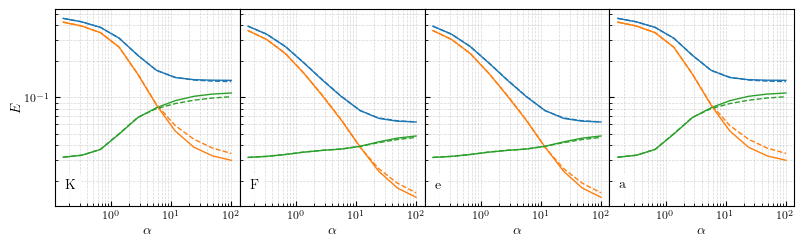

In [31]:

IMG_DIRECTORY = "./Assets/feature_combination_sweeps"
if not os.path.exists(IMG_DIRECTORY):
    os.makedirs(IMG_DIRECTORY)


def save_plot(fig, name, formats=["pdf","jpg"], date=False):
    current_date = datetime.datetime.now().strftime("%Y-%m-%d")
    for f in formats:        
        path = "{}".format(name) + "_{}".format(current_date) + "." + f
        if not date:
            path = "{}".format(name) + "." + f
        fig.savefig(            
            os.path.join(IMG_DIRECTORY, path),
            format=f,
        )


def set_size(width, fraction=1, subplots=(1, 1)):
    if width == "thesis":
        width_pt = 426.79135
    elif width == "beamer":
        width_pt = 307.28987
    else:
        width_pt = width

    fig_width_pt = width_pt * fraction
    inches_per_pt = 1 / 72.27

    golden_ratio = (5**0.5 - 1) / 2

    fig_width_in = fig_width_pt * inches_per_pt
    fig_height_in = fig_width_in * (golden_ratio) * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)


# width = 2.5 * 458.63788


plt.style.use("../latex_ready.mplstyle")

multiplier = 1.25
width = multiplier * 487.8225
tuple_size = set_size(width, subplots=(1,2))
tuple_size = (8.5,2.4)


second_multiplier = 0.7


fig, axes = plt.subplots(
    nrows=1,
    ncols=4,
    sharex=True,
    sharey=True,
    figsize=( tuple_size[0], tuple_size[1]),
    gridspec_kw={"hspace": 0,"wspace": 0},
)


# ICML adjustments
fig.subplots_adjust(left=0.12)
fig.subplots_adjust(bottom=0.08)
fig.subplots_adjust(top=0.9)
fig.subplots_adjust(right=0.99)
# plt.subplots_adjust(bottom=0.20)

# log the figure size
print("Figure size: ", fig.get_size_inches())


from matplotlib.lines import Line2D

axes = axes.flatten()

# Create a custom legend
legend_elements = [Line2D([0], [0], color='blue', label='Line 1'),
                   Line2D([0], [0], color='orange', label='Line 2')]
custom_legend = []

from scipy.special import erfc
from scipy.integrate import quad


for df_idx, (key, value) in enumerate(df_dict.items()):

    data_model_name = key

    axs = axes[df_idx]
    
    # if df_idx> 0:
    #     continue


    linestyles = ["solid", "dashed", "dashdot", "dotted"]

    # print(value[0.1]['adversarial_error'])

    for idx, (epsilon, eps_dict) in enumerate(value.items()):

        print("Epsilon: ", epsilon)

        # ax = axes[idx]

        alphas = eps_dict["alphas"]
        adversarial_error = eps_dict["adversarial_error"]
        generalization_error = eps_dict["generalization_error"]
        boundary_error = eps_dict["boundary_error"]
        class_preserving = eps_dict["class_preserving"]

        adversarial_error_erm = eps_dict["adversarial_error_erm"]
        generalization_error_erm = eps_dict["generalization_error_erm"]
        boundary_error_erm = eps_dict["boundary_error_erm"]
        class_preserving_erm = eps_dict["class_preserving_erm"]

        rho = eps_dict["rho"]
        tau = eps_dict["tau"]

        qs = eps_dict["qs"]
        ms = eps_dict["ms"]


        adversarial_error_erm_std = eps_dict["adversarial_error_erm_std"]
        generalization_error_erm_std = eps_dict["generalization_error_erm_std"]
        boundary_error_erm_std = eps_dict["boundary_error_erm_std"]
        class_preserving_erm_std = eps_dict["class_preserving_erm_std"]

        if df_idx == 0:

            custom_legend.append(Line2D([0],[0],color="C0", linestyle=linestyles[idx], label=r"$E_{{\mathrm{{adv}}}}, \varepsilon_t={}$".format(epsilon)))
            custom_legend.append(Line2D([0],[0],color="C1", linestyle=linestyles[idx], label=r"$E_{{\mathrm{{gen}}}}, \varepsilon_t={}$".format(epsilon)))
            custom_legend.append(Line2D([0],[0],color="C2", linestyle=linestyles[idx], label=r"$E_{{\mathrm{{bound}}}}, \varepsilon_t={}$".format(epsilon)))
            custom_legend.append(Line2D([0],[0],color="C3", linestyle=linestyles[idx], label=r"$E_{{\mathrm{{CP}}}}, \varepsilon_t={}$".format(epsilon)))
        


        adversarial_lines = axs.plot(alphas, adversarial_error, linestyle=linestyles[idx],color="C0")
        axs.plot(alphas, generalization_error, linestyle=linestyles[idx],color="C1")
        
        # axs.plot(alphas, np.arccos(ms/np.sqrt(rho*qs))/np.pi, linestyle=linestyles[idx],color="C5")
        axs.plot(alphas, boundary_error,linestyle=linestyles[idx], color="C2")
        
        # axs.plot(alphas, class_preserving,linestyle=linestyles[idx], color="C3")

        

        def integrand(xi):
            return erfc(-np.sqrt(rho)/tau * xi * (1/np.sqrt(2))) * np.exp(-xi**2 / 2) / np.sqrt(2*np.pi)
        
        # def integrand(xi):
        #     a = 1 / np.sqrt(1 + tau**2/rho)
        #     return erfc(- a / np.sqrt(2*(1-a**2)) * xi) * np.exp(-xi**2 / 2) / np.sqrt(2*np.pi)
        
        psi_i = 0.5
        if df_idx > 1:
            psi_i = 2

        I = quad(integrand, 0, 0.2 / np.sqrt(psi_i))[0]

        # if idx == 0:

        #     plot_range = alphas[4*len(alphas)//5:]

        #     axs.plot(plot_range, np.ones(len(plot_range)) * np.arccos(1/np.sqrt(1+tau**2/rho))/np.pi, linestyle=linestyles[0],color="black")
        #     axs.plot(plot_range, np.ones(len(plot_range))*I,linestyle=linestyles[0], color="black")

        # plot a horizontal line at two-thirds of the x axis until the right end of the plot at a constant values

        axs.errorbar(
            alphas,
            adversarial_error_erm,
            yerr=adversarial_error_erm_std,
            fmt=".",
            markersize=1,
            color="C0"
        )
        axs.errorbar(
            alphas,
            generalization_error_erm,
            yerr=generalization_error_erm_std,
            fmt=".",
            markersize=1,
            color="C1"
        )
        axs.errorbar(
            alphas,
            boundary_error_erm,
            yerr=boundary_error_erm_std,
            fmt=".",
            markersize=1,
            color="C2"
        )
        # axs.errorbar(
        #     alphas,
        #     class_preserving_erm,
        #     yerr=class_preserving_erm_std,
        #     fmt=".",
        #     markersize=1,
        #     color="C3"
        # )


    axs.set_xscale("log")
    axs.set_yscale("log")


    if df_idx  == 0:
        axs.set_ylabel(r"$E$", labelpad=2.0)
    # axs.set_ylabel(r"$E$", labelpad=2.0)


    axs.set_xlabel(r"$\alpha$", labelpad=2.0)
    axs.grid(which="both", axis="both", alpha=0.5)
    axs.legend(title=data_model_name.replace("/","/\n"), loc="lower left")

    # Set the major ticks to face inwards
    axs.tick_params(axis='both', which='major', direction='in')

    # Set the minor ticks to face inwards
    axs.tick_params(axis='both', which='minor', direction='in')


error_legend = []

error_legend.append(Line2D([0],[0],label=r"$E_{\mathrm{adv}}$",color="C0"))
error_legend.append(Line2D([0],[0],label=r"$E_{\mathrm{gen}}$",color="C1"))
error_legend.append(Line2D([0],[0],label=r"$E_{\mathrm{bound}}$",color="C2"))
error_legend.append(Line2D([0],[0],label=r"$E_{\mathrm{CP}}$",color="C3"))


epsilon_legend = []

for idx, epsilon in enumerate(epsilons):
    epsilon_legend.append(Line2D([0],[0],color="black", linestyle=linestyles[idx], label=r"$\varepsilon_t={}$".format(epsilons[idx]))) 

custom_legend = []

# mix the two legends
for idx in range(len(error_legend)):
    pass
    # custom_legend.append(error_legend[idx])
    # custom_legend.append(epsilon_legend[idx])

# Place the legend at the bottom of the figure
# fig.legend(handles=custom_legend, loc='upper center', ncol=4)

save = True
if save:
    save_plot(
        fig,
        f"feature_combinations_alpha_sweep",
    )

plt.show()

Figure size:  [0.85 1.32]


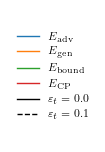

In [32]:
error_legend = []

error_legend.append(Line2D([0],[0],label=r"$E_{\mathrm{adv}}$",color="C0"))
error_legend.append(Line2D([0],[0],label=r"$E_{\mathrm{gen}}$",color="C1"))
error_legend.append(Line2D([0],[0],label=r"$E_{\mathrm{bound}}$",color="C2"))
error_legend.append(Line2D([0],[0],label=r"$E_{\mathrm{CP}}$",color="C3"))


epsilon_legend = []

for idx, epsilon in enumerate(epsilons):
    epsilon_legend.append(Line2D([0],[0],color="black", linestyle=linestyles[idx], label=r"$\varepsilon_t={}$".format(epsilons[idx]))) 

custom_legend = error_legend + epsilon_legend

# save the legend separately, put the custom legend into a figure
figlegend = plt.figure(figsize=( 0.1 * tuple_size[0],0.55 *tuple_size[1]))
plt.style.use("../latex_ready.mplstyle")
legend_ax = figlegend.add_axes([0, 0, 1, 1])
legend_ax.axis('off')  # Turn off the axes for the legend figure

# print figsize
print("Figure size: ", figlegend.get_size_inches())

figlegend.legend(
    handles=custom_legend,
    handlelength=2,
    loc="center",
    ncol=1,
)

figlegend.savefig(
    os.path.join(IMG_DIRECTORY, "legend.pdf"),
    format="pdf",
    # bbox_inches="tight",
)


plt.show()



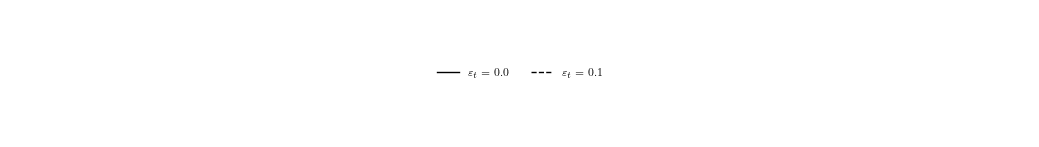

In [33]:


# save the legend separately, put the custom legend into a figure
figlegend = plt.figure(figsize=( 1.2 * tuple_size[0],0.15 * tuple_size[0]))
plt.style.use("../latex_ready.mplstyle")
legend_ax = figlegend.add_axes([0, 0, 1, 1])
legend_ax.axis('off')  # Turn off the axes for the legend figure

figlegend.legend(
    handles=epsilon_legend,
    handlelength=2,
    loc="center",
    ncol=5,
)

figlegend.savefig(
    os.path.join(IMG_DIRECTORY, "feature_combinations_alpha_sweep_legend_epsilon.pdf"),
    format="pdf",
    # bbox_inches="tight",
)


plt.show()

